In [ ]:
# ! pip install pydub
# ! pip install audiosegment
# ! pip install resampy
# ! pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for webrtcvad: filename=webrtcvad-2.0.10-cp310-cp310-linux_x86_64.whl size=81216 sha256=a6426d31833c4ac03aa2f612a706fb9c159704b18654b5ebc92de5cd5107c521
  Stored in directory: /root/.cache/pip/wheels/2a/2b/84/ac7bacfe8c68a87c1ee3dd3c66818a54c71599abf308e8eb35
Successfully built webrtcvad
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 56.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
import librosa
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Fungsi untuk ekstraksi fitur menggunakan MFCC
def extract_mfcc(file_path, n_mfcc=13, max_len=60):
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
    if (max_len > mfcc.shape[1]):
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_len]
    return mfcc

# Fungsi untuk ekstraksi fitur menggunakan Spectrogram
def extract_spectrogram(file_path, n_mels=128, n_fft=2048, hop_length=512, max_len=60):
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)
    spectrogram = librosa.power_to_db(spectrogram)
    if (max_len > spectrogram.shape[1]):
        pad_width = max_len - spectrogram.shape[1]
        spectrogram = np.pad(spectrogram, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        spectrogram = spectrogram[:, :max_len]
    return spectrogram

# Load data dari file CSV
data = pd.read_csv('/content/drive/MyDrive/Product_Capstone_Materials/filtered_5class.csv')

# Load label encoder dan fitting
label_encoder = LabelEncoder()
label_encoder.fit(data['label'])

# Memuat model yang telah disimpan
model = load_model('/content/drive/MyDrive/modelhijaiyah.h5')

# Looping untuk setiap indeks pada dataframe
for index, row in data.iterrows():
    # Mendapatkan path file dari kolom "Path"
    file_path = row['Path']

    # Memeriksa apakah file audio ada
    if not os.path.exists(file_path):
        print(f"File tidak ditemukan untuk indeks {index}!")
    else:
        # Ekstraksi fitur MFCC dan Spectrogram dari data audio
        mfcc_features = extract_mfcc(file_path)
        spectrogram_features = extract_spectrogram(file_path)

        # Ubah dimensi data untuk model CNN
        mfcc_features = mfcc_features[np.newaxis, ..., np.newaxis]
        spectrogram_features = spectrogram_features[np.newaxis, ..., np.newaxis]

        # Prediksi label menggunakan model
        predictions = model.predict([mfcc_features, spectrogram_features])

        # Decode label menggunakan label_encoder
        predicted_label = label_encoder.inverse_transform([np.argmax(predictions)])[0]

        print('Path:', file_path)
        print('Predicted label:', predicted_label)
        print('---')

1/1 [==============================] - 0s 224ms/step
Path: /content/drive/MyDrive/Product_Capstone_Materials/Alphabet Classification (Multi-Class)/2_8_Hamzah_T162.wav
Predicted label: hamzah
---
1/1 [==============================] - 0s 50ms/step
Path: /content/drive/MyDrive/Product_Capstone_Materials/Alphabet Classification (Multi-Class)/2_4_Noon_T28.wav
Predicted label: noon
---
1/1 [==============================] - 0s 52ms/step
Path: /content/drive/MyDrive/Product_Capstone_Materials/Alphabet Classification (Multi-Class)/1_5_Taj_Tua_T (8).wav
Predicted label: tua
---
1/1 [==============================] - 0s 44ms/step
Path: /content/drive/MyDrive/Product_Capstone_Materials/Alphabet Classification (Multi-Class)/2_8_Taj_Hamzah_T1 (51).wav
Predicted label: hamzah
---
1/1 [==============================] - 0s 42ms/step
Path: /content/drive/MyDrive/Product_Capstone_Materials/Alphabet Classification (Multi-Class)/0_0_Taj_Alif_T (72).wav
Predicted label: alif
---
1/1 [=====================

In [ ]:
# # Fungsi untuk ekstraksi fitur menggunakan MFCC
# def extract_mfcc(file_path, n_mfcc=13, max_len=60):
#     audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
#     mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
#     if (max_len > mfcc.shape[1]):
#         pad_width = max_len - mfcc.shape[1]
#         mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
#     else:
#         mfcc = mfcc[:, :max_len]
#     return mfcc

# # Fungsi untuk ekstraksi fitur menggunakan Spectrogram
# def extract_spectrogram(file_path, n_mels=128, n_fft=2048, hop_length=512, max_len=60):
#     audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
#     spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)
#     spectrogram = librosa.power_to_db(spectrogram)
#     if (max_len > spectrogram.shape[1]):
#         pad_width = max_len - spectrogram.shape[1]
#         spectrogram = np.pad(spectrogram, pad_width=((0, 0), (0, pad_width)), mode='constant')
#     else:
#         spectrogram = spectrogram[:, :max_len]
#     return spectrogram

# # Load data dari file CSV
# data = pd.read_csv('/content/drive/MyDrive/Product_Capstone_Materials/filtered_5class.csv')

# # Memuat model yang telah disimpan
# model = load_model('/content/drive/MyDrive/modelhijaiyah.h5')

# # Buat list kosong untuk menyimpan hasil path dan prediksi
# results = []

# # Buat list kosong untuk menyimpan label sebenarnya dan prediksi
# true_labels = []
# predicted_labels = []

# # Looping untuk setiap indeks pada dataframe
# for index, row in data.iterrows():
#     # Mendapatkan path file dari kolom "Path"
#     file_path = row['Path']

#     # Mendapatkan label sebenarnya dari kolom "Label"
#     true_label = row['label']

#     # Memeriksa apakah file audio ada
#     if not os.path.exists(file_path):
#         print(f"File tidak ditemukan untuk indeks {index}!")
#     else:
#         # Ekstraksi fitur MFCC dan Spectrogram dari data audio
#         mfcc_features = extract_mfcc(file_path)
#         spectrogram_features = extract_spectrogram(file_path)

#         # Ubah dimensi data untuk model CNN
#         mfcc_features = mfcc_features[np.newaxis, ..., np.newaxis]
#         spectrogram_features = spectrogram_features[np.newaxis, ..., np.newaxis]

#         # Prediksi label menggunakan model
#         predictions = model.predict([mfcc_features, spectrogram_features])

#         # Decode label menggunakan label_encoder
#         predicted_label = label_encoder.inverse_transform([np.argmax(predictions)])[0]

#         # Menambahkan hasil path dan prediksi ke dalam list results
#         results.append({'Path': file_path, 'Predicted Label': predicted_label})

#         # Menambahkan label sebenarnya dan prediksi ke dalam list true_labels dan predicted_labels
#         true_labels.append(true_label)
#         predicted_labels.append(predicted_label)

# # Buat dataframe dari list results
# results_df = pd.DataFrame(results)
# print(results_df)

# Hitung confusion matrix
confusion_matrix = confusion_matrix(true_labels, predicted_labels)
print('Confusion Matrix:')
print(confusion_matrix)

1/1 [==============================] - 0s 37ms/step
                                                  Path Predicted Label
0    /content/drive/MyDrive/Product_Capstone_Materi...          hamzah
1    /content/drive/MyDrive/Product_Capstone_Materi...            noon
2    /content/drive/MyDrive/Product_Capstone_Materi...             tua
3    /content/drive/MyDrive/Product_Capstone_Materi...          hamzah
4    /content/drive/MyDrive/Product_Capstone_Materi...            alif
..                                                 ...             ...
827  /content/drive/MyDrive/Product_Capstone_Materi...            alif
828  /content/drive/MyDrive/Product_Capstone_Materi...          hamzah
829  /content/drive/MyDrive/Product_Capstone_Materi...            alif
830  /content/drive/MyDrive/Product_Capstone_Materi...            noon
831  /content/drive/MyDrive/Product_Capstone_Materi...            noon

[832 rows x 2 columns]
Confusion Matrix:
[[164   2   1   0   0]
 [  0 156   3   0   1]
 [  5   

In [ ]:
print(confusion_matrix)

[[164   2   1   0   0]
 [  0 156   3   0   1]
 [  5   2 157   3   2]
 [  0   0   0 168   0]
 [  1   6  12   0 149]]


In [ ]:
results_df

,Path,Predicted Label
0,/content/drive/MyDrive/Product_Capstone_Materi...,hamzah
1,/content/drive/MyDrive/Product_Capstone_Materi...,noon
2,/content/drive/MyDrive/Product_Capstone_Materi...,tua
3,/content/drive/MyDrive/Product_Capstone_Materi...,hamzah
4,/content/drive/MyDrive/Product_Capstone_Materi...,alif
...,...,...
827,/content/drive/MyDrive/Product_Capstone_Materi...,alif
828,/content/drive/MyDrive/Product_Capstone_Materi...,hamzah
829,/content/drive/MyDrive/Product_Capstone_Materi...,alif
830,/content/drive/MyDrive/Product_Capstone_Materi...,noon


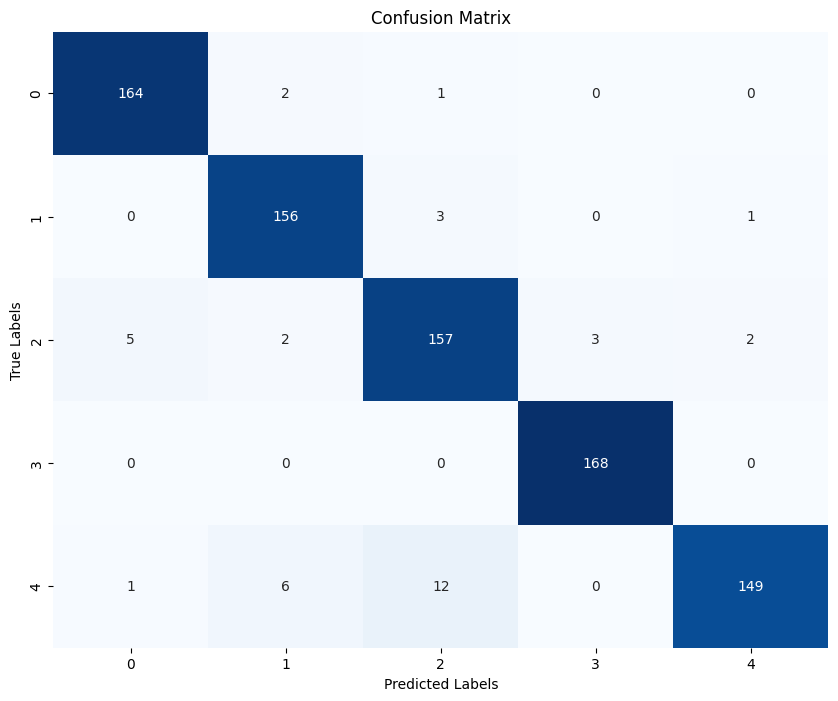

In [ ]:
# Visualisasi confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()